<a href="https://colab.research.google.com/github/emily-soto/DataScience-final/blob/main/DS_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final DS - 2021

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!pip install heatmapz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from heatmap import heatmap, corrplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
import pylab
from sklearn.model_selection import train_test_split

In [ ]:
df =pd.read_csv("Data-Limpia-V2.csv")
del df['Unnamed: 0']
del df['Id']
df=df.rename(columns={'PCP10_B':'nacimiento', 'PCP12':'origen_etnico', 'PCP13':'comunidad_lin', 'PCP15':'lengua_nativa', 'PCP22':'alfabetismo','PCP30_1D':'ocupacion', 'PCP31_D':'cat_ocupacional', 'PCP37':'edad_pat', 'ANEDUCA':'anios_educ'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235963 entries, 0 to 235962
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   DEPARTAMENTO     235963 non-null  int64
 1   nacimiento       235963 non-null  int64
 2   origen_etnico    235963 non-null  int64
 3   comunidad_lin    235963 non-null  int64
 4   lengua_nativa    235963 non-null  int64
 5   alfabetismo      235963 non-null  int64
 6   ocupacion        235963 non-null  int64
 7   cat_ocupacional  235963 non-null  int64
 8   edad_pat         235963 non-null  int64
 9   anios_educ       235963 non-null  int64
dtypes: int64(10)
memory usage: 18.0 MB


In [ ]:
df.head(4)

,DEPARTAMENTO,nacimiento,origen_etnico,comunidad_lin,lengua_nativa,alfabetismo,ocupacion,cat_ocupacional,edad_pat,anios_educ
0,1,4,1,11,11,1,1,2,26,19
1,1,1,1,12,25,1,4,3,21,12
2,1,20,1,11,25,1,8,5,26,6
3,1,1,1,1,25,1,3,4,28,17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3e39c9450>,
      dtype=object)

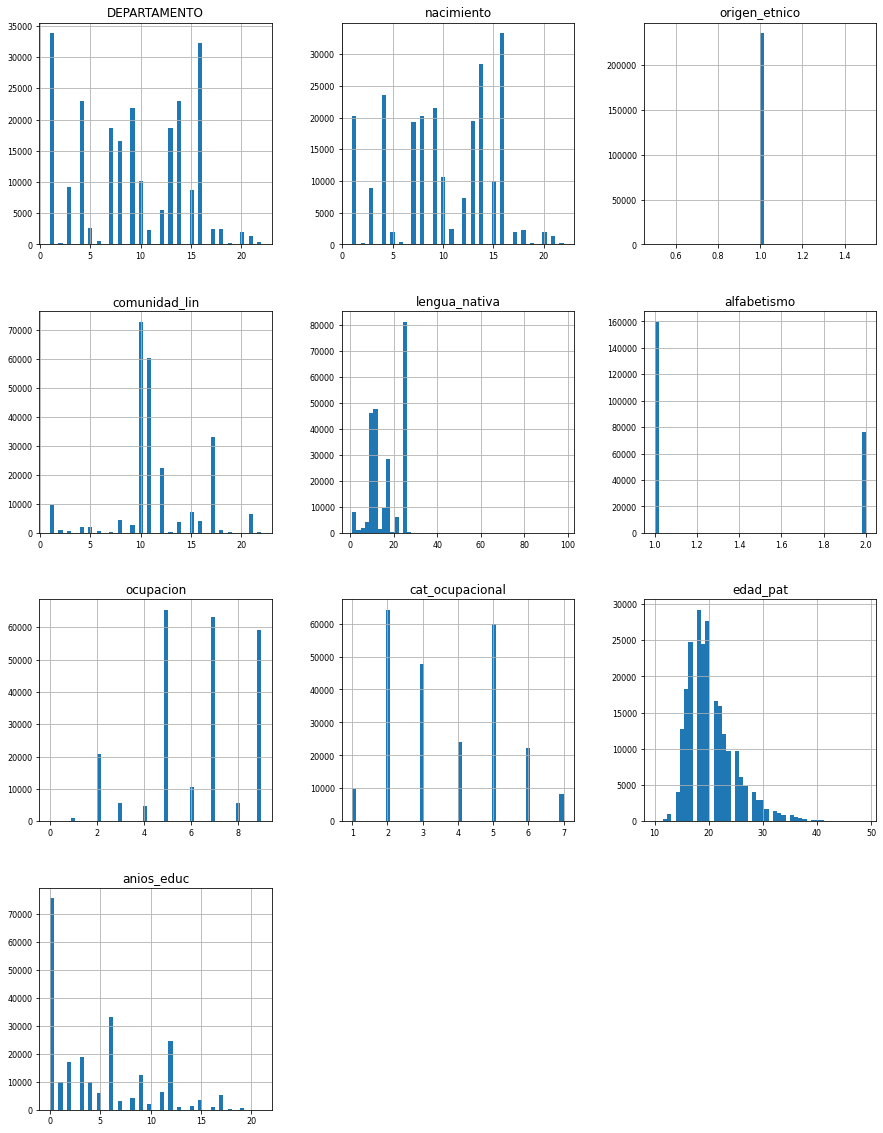

In [ ]:
#Distribuciones de variables
dnum = df.select_dtypes(include = 'int64')
dnum.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)

DEPARTAMENTO


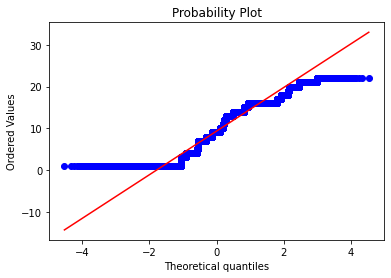

nacimiento


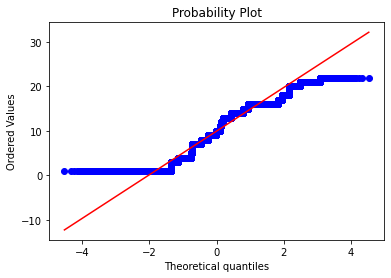

origen_etnico


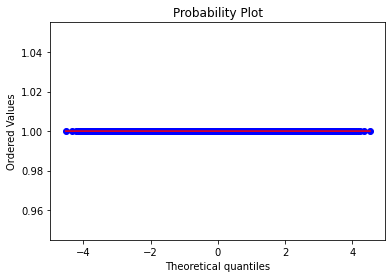

comunidad_lin


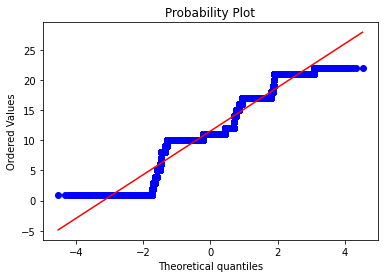

lengua_nativa


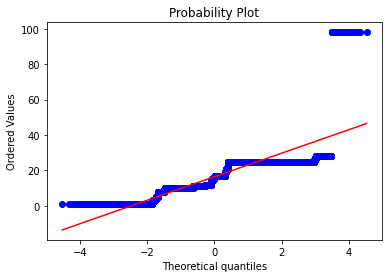

alfabetismo


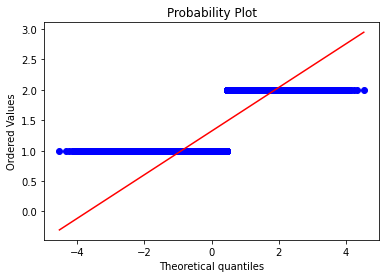

ocupacion


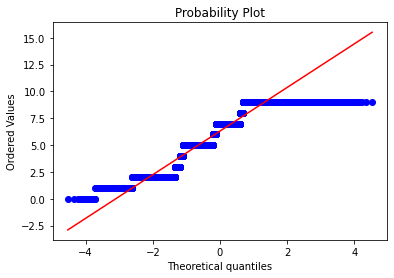

cat_ocupacional


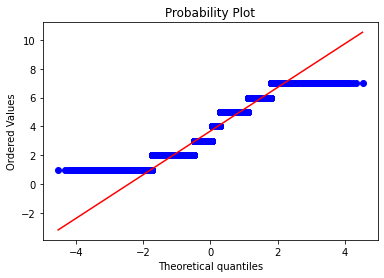

edad_pat


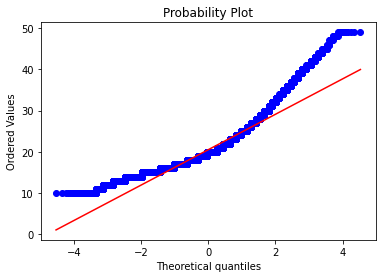

anios_educ


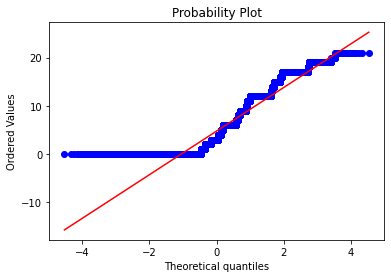

In [ ]:
for i in dnum:
    stats.probplot(dnum[i], dist="norm", plot=pylab)
    print(i)
    pylab.show()

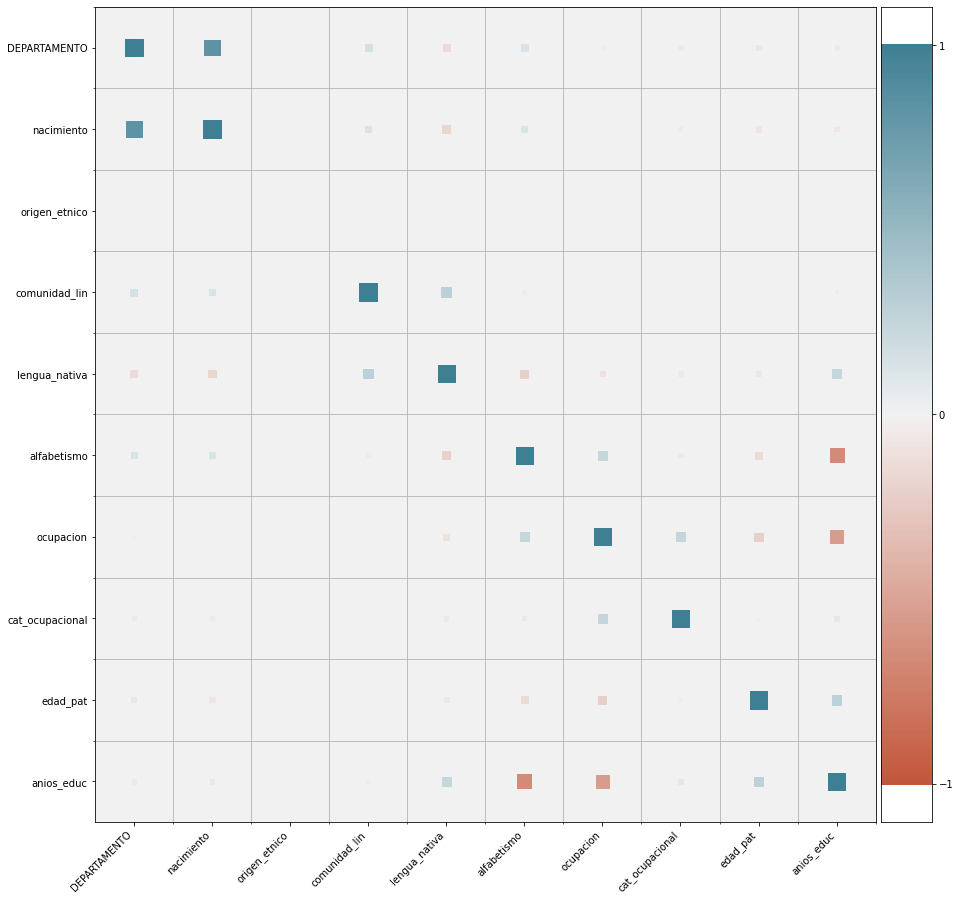

In [ ]:
plt.figure(figsize=(15, 15))
corrplot(df.corr(), size_scale=300);

In [ ]:
del df['origen_etnico']

In [ ]:
df[df.columns[1:-1]].apply(lambda x: x.corr(df['DEPARTAMENTO']))

nacimiento         0.828985
comunidad_lin      0.153103
lengua_nativa     -0.150875
alfabetismo        0.131190
ocupacion         -0.028737
cat_ocupacional   -0.053553
edad_pat          -0.076164
dtype: float64

In [ ]:
y = df['DEPARTAMENTO']
del df['DEPARTAMENTO']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=77)

In [ ]:
models = {
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "           Stochastic Gradient Descent": SGDClassifier(),
    "                   Logistic Regression":LogisticRegression(),
}
for name, model in models.items():
    model.fit(X_train, y_train)

## Train

In [ ]:
for name, model in models.items():
    print(name + " Score: {:.3f}%".format(model.score(X_train, y_train) * 100))

                   K-Nearest Neighbors Score: 85.034%
                         Decision Tree Score: 94.008%
                         Random Forest Score: 94.006%
           Stochastic Gradient Descent Score: 38.240%
                   Logistic Regression Score: 41.283%


## Test

In [ ]:
for name, model in models.items():
    print(name + " Score: {:.3f}%".format(model.score(X_test, y_test) * 100))

                   K-Nearest Neighbors Score: 81.606%
                         Decision Tree Score: 82.494%
                         Random Forest Score: 85.631%
           Stochastic Gradient Descent Score: 38.384%
                   Logistic Regression Score: 41.341%


## Train

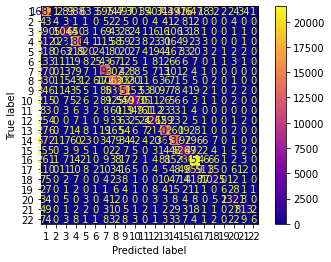

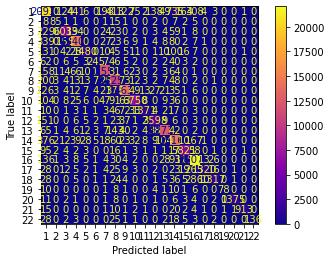

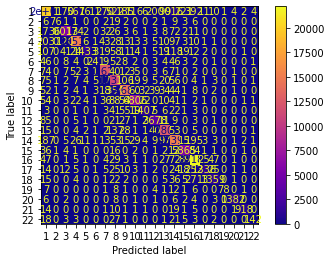

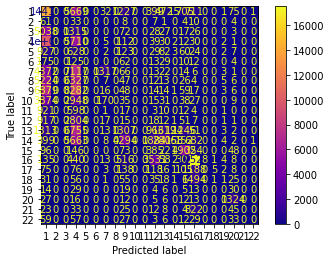

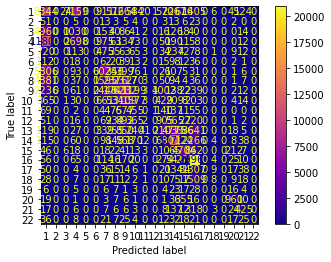

In [ ]:
for name, model in models.items():
    plot_confusion_matrix(model, X_train, y_train, cmap='plasma')
  

## Test

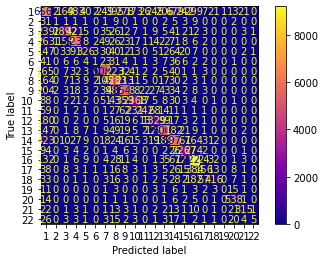

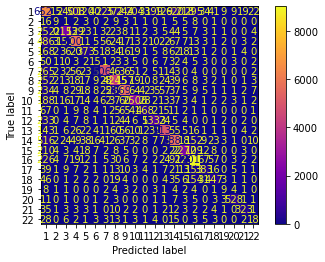

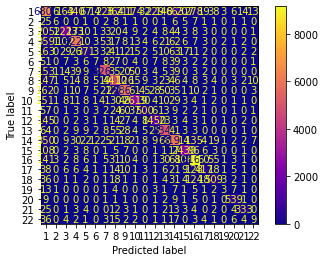

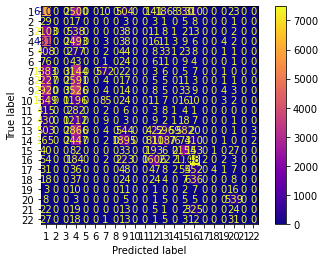

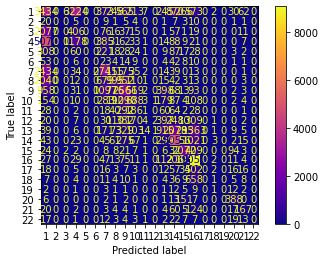

In [ ]:
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, cmap='plasma')

## Train

In [ ]:
for name, model in models.items():
    y_scores = cross_val_predict(model, X_train, y_train, cv=10)
    print(metrics.classification_report(y_train, y_scores, digits=3))

              precision    recall  f1-score   support

           1      0.717     0.646     0.679     23718
           2      0.071     0.008     0.014       128
           3      0.841     0.702     0.765      6526
           4      0.838     0.904     0.870     16067
           5      0.769     0.394     0.521      1887
           6      0.095     0.014     0.024       430
           7      0.876     0.892     0.884     12931
           8      0.729     0.855     0.787     11671
           9      0.829     0.839     0.834     15339
          10      0.788     0.774     0.781      7147
          11      0.694     0.322     0.440      1567
          12      0.698     0.773     0.734      3844
          13      0.878     0.886     0.882     13099
          14      0.795     0.853     0.823     16062
          15      0.801     0.836     0.818      6027
          16      0.861     0.949     0.903     22539
          17      0.601     0.193     0.292      1735
          18      0.819    

## Test

In [ ]:
for name, model in models.items():
    y_scores = cross_val_predict(model, X_test, y_test, cv=10)
    print(metrics.classification_report(y_test, y_scores, digits=3))

              precision    recall  f1-score   support

           1      0.700     0.636     0.666     10118
           2      0.250     0.030     0.053        67
           3      0.801     0.628     0.704      2716
           4      0.818     0.887     0.851      6904
           5      0.749     0.370     0.495       806
           6      0.080     0.011     0.020       175
           7      0.865     0.871     0.868      5643
           8      0.697     0.820     0.754      4865
           9      0.782     0.813     0.797      6526
          10      0.751     0.716     0.733      3003
          11      0.658     0.266     0.379       722
          12      0.670     0.725     0.697      1692
          13      0.861     0.858     0.859      5600
          14      0.777     0.846     0.810      6969
          15      0.796     0.821     0.808      2689
          16      0.846     0.949     0.894      9702
          17      0.427     0.110     0.175       691
          18      0.816    